In [1]:
import numpy as np 
import pandas as pd
import random as rm
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import random

def random_color():
    rgbl=[round(random.uniform(0, 1),1),round(random.uniform(0, 1),1),round(random.uniform(0, 1),1)]
    return tuple(rgbl)

# Simulations of particle trajectories

In [2]:
def normal_diff(delta_time, diffusion_coefficient, min_tlength, max_tlength, sigma, num_traces):
    traces = []
    track_length = np.random.randint(min_tlength,max_tlength,size=num_traces)
    
    for n in range(num_traces-1):
        two_D_t = 2*diffusion_coefficient[n]*delta_time
        trace_n = np.zeros(shape = (1,2))
        
        for step in range(track_length[n]-1):
            step_x = np.random.normal(loc=0.0, scale=np.sqrt(two_D_t), size=1)
            step_y = np.random.normal(loc=0.0, scale=np.sqrt(two_D_t), size=1)
            
            xy = np.hstack((step_x,step_y))
            trace_step = trace_n[step] + xy
            
            trace_n = np.vstack((trace_n,trace_step))
            
        traces.append((trace_n))
    
    matrix_x, matrix_y = np.empty(shape=(1, max_tlength)), np.empty(shape=(1, max_tlength))
    
    for trace_m in traces:
        trace_m_x, trace_m_y = trace_m[:,0], trace_m[:,1]

        delta_length = max_tlength-len(trace_m_x)
        zero = np.zeros(shape = (delta_length))
        
        trace_x_ex = np.hstack((zero, trace_m_x))
        trace_y_ex = np.hstack((zero, trace_m_y))
        
        matrix_x = np.vstack((matrix_x, trace_x_ex))
        matrix_y = np.vstack((matrix_y, trace_y_ex))
        
        # fjern første track i matricen.
        # if np.isnan(matrix_y_test).any == "true":
        #     matrix_x = matrix_x[~np.isnan(matrix_x).any(axis=1)]
        #     matrix_y = matrix_y[~np.isnan(matrix_y).any(axis=1)]
                
        # matrix_x = np.delete(matrix_x,0,0)
        # matrix_y = np.delete(matrix_y,0,0)
    
    return traces, matrix_x, matrix_y

In [3]:
dt = 1/30 #ca. 36 millisec, kameratid åbent
dim = 2
num_traces = 1301 #increase
D_track = np.random.uniform(low = 10**-3, high = 1, size=(num_traces)) #mum^2/sec
min_tlength = 5
max_tlength = 100
q = np.random.uniform(1,9, size=num_traces)
sigmaND = np.sqrt(D_track*dt)/q

traces_test, matrix_x_test, matrix_y_test = normal_diff(dt,D_track,min_tlength,max_tlength,sigmaND,num_traces)

matrix_x_test = np.delete(matrix_x_test,0,0)
matrix_y_test = np.delete(matrix_y_test,0,0)
D_track = np.delete(D_track,0,0)

# print(np.delete(matrix_x_test,0,0).shape)
print(matrix_x_test.shape,matrix_y_test.shape,D_track.shape)

(1300, 100) (1300, 100) (1300,)


In [240]:
D_track = np.random.uniform(low = 10**-3, high = 1, size=(1300)) #mum^2/sec

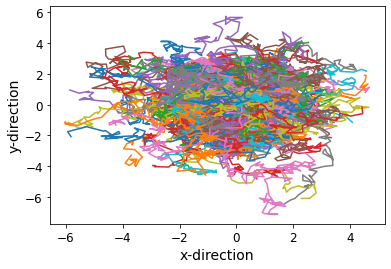

In [4]:
for i in range(801):
    plt.plot(traces_test[i][:,0],traces_test[i][:,1])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('x-direction',fontsize=14)
    plt.ylabel('y-direction',fontsize=14)

In [241]:
# Split into training and testing data
train_traces = traces_test[:800]
val_traces = traces_test[800:1000]
test_1_traces = traces_test[1000:1100]
test_2_traces = traces_test[1100:1200]
test_3_traces = traces_test[1200:]

train_matrix_x = matrix_x_test[:800]
val_matrix_x = matrix_x_test[800:1000]
test_1_x = matrix_x_test[1000:1100]
test_2_x = matrix_x_test[1100:1200]
test_3_x = matrix_x_test[1200:]

train_matrix_y = matrix_y_test[:800]
val_matrix_y = matrix_y_test[800:1000]
test_1_y = matrix_y_test[1000:1100]
test_2_y = matrix_y_test[1100:1200]
test_3_y = matrix_y_test[1200:]

train_d_track = D_track[:800]
val_d_track = D_track[800:1000]
test_1_d_track = D_track[1000:1100]
test_2_d_track = D_track[1100:1200]
test_3_d_track = D_track[1200:]

Text(0, 0.5, 'Frequency')

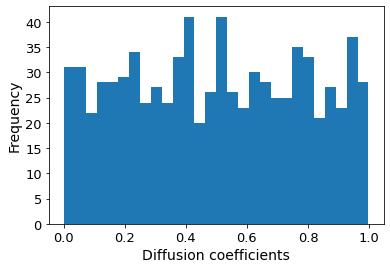

In [98]:
plt.hist(train_d_track,bins=int(np.sqrt(800)))
# weights=np.ones_like(train_d_track) / len(train_d_track)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Diffusion coefficients',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

In [45]:
# plt.hist(track_length_test,bins=int(np.sqrt(num_traces)))
# plt.xlabel('Track lengths')
# plt.ylabel('Occurence')

# Machine learning with GPR

In [116]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [117]:
np.where(np.isnan(matrix_y_test))
# np.isnan(matrix_y_test).any

(array([], dtype=int64), array([], dtype=int64))

In [247]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e10))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

gaussian_process.fit(train_matrix_x,train_d_track)
gx1 = gaussian_process.predict(test_1_x)
gx2 = gaussian_process.predict(test_2_x)
gx3 = gaussian_process.predict(test_3_x)

C:\Users\pemay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [248]:
gaussian_process.fit(train_matrix_y,train_d_track)
gy1 = gaussian_process.predict(test_1_y)
gy2 = gaussian_process.predict(test_2_y)
gy3 = gaussian_process.predict(test_3_y)

In [265]:
result1 = np.add(gx1,gy1)/2
result2 = np.add(gx2,gy2)/2
result3 = np.add(gx3,gy3)/2

from sklearn.metrics import mean_squared_error
mse1_gpr = mean_squared_error(test_1_d_track,result1)
mse2_gpr = mean_squared_error(test_2_d_track,result2)
mse3_gpr = mean_squared_error(test_3_d_track,result3)
mse_gpr = [mse1_gpr,mse2_gpr,mse3_gpr]
print(mse1_gpr,mse2_gpr,mse3_gpr)
print("Standard deviation is % s "
                % (statistics.stdev(mse_gpr)))

0.3154767129710059 0.29148157474327285 0.30766615339231895
Standard deviation is 0.012238682428727039 


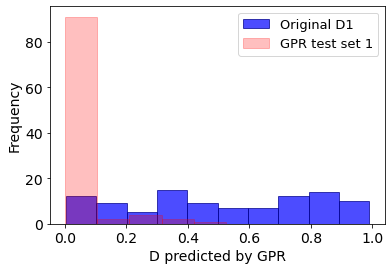

In [258]:
plt.hist(np.array(test_1_d_track),bins=10,color='blue',alpha=0.70,edgecolor='darkblue',label='Original D1')
plt.hist(np.array(result1),bins=5,color='red',alpha=0.25,edgecolor=(1, 0, 0, 1),label=r'GPR test set 1')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('D predicted by GPR',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=13)
plt.show()

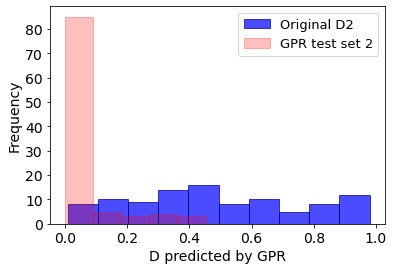

In [259]:
plt.hist(np.array(test_2_d_track),bins=10,color='blue',alpha=0.70,edgecolor='darkblue',label='Original D2')
plt.hist(np.array(result2),bins=5,color='red',alpha=0.25,edgecolor=(1, 0, 0, 1),label=r'GPR test set 2')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('D predicted by GPR',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=13)
plt.show()

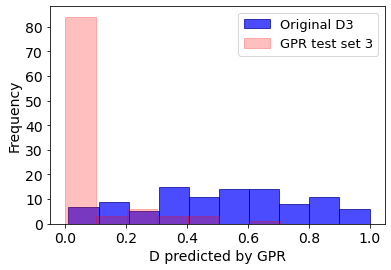

In [261]:
plt.hist(np.array(test_3_d_track),bins=10,color='blue',alpha=0.70,edgecolor='darkblue',label='Original D3')
plt.hist(np.array(result3),bins=7,color='red',alpha=0.25,edgecolor=(1, 0, 0, 1),label=r'GPR test set 3')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('D predicted by GPR',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=13)
plt.show()

Text(0, 0.5, 'D predicted by GPR')

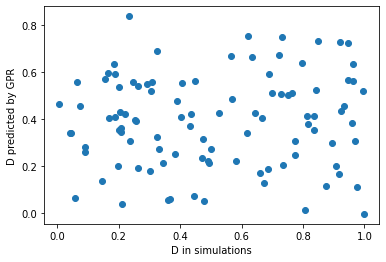

In [53]:
plt.scatter(D_track[200:],result)
plt.xlabel('D in simulations')
plt.ylabel('D predicted by GPR')

# Fit for mean squared displacement (MSD)

In [7]:
def SquareDist(x0, x1, y0, y1):
    return (x1 - x0) ** 2 + (y1 - y0) ** 2

In [8]:
def msd(t, frac):
    if t.shape[1]==2:
        x = t[:,0]
        y = t[:,1]
    elif t.shape[1]==3:
        x = t[:,0]
        y = t[:,1]

    N = int(len(x) * frac) if len(x)>10 else len(x)
    msd = []
    for lag in range(1, N):
        msd.append(np.mean([SquareDist(x[j], x[j + lag], y[j], y[j + lag])
        for j in range(len(x) - lag)]))
    return np.array(msd)

In [35]:
# D_track = np.full((1300,),0.5)

In [324]:
MSDs = []
# test = test_1_traces+test_2_traces+test_3_traces
for t in test_1_traces:
    MSDs.append(msd(t, 1))
MSDs = np.array(MSDs, dtype=object)
# print(len(MSDs[0]))

a_list = []
b_list = []
d_list = []
from sklearn import preprocessing

# # https://docs.mdanalysis.org/2.0.0/documentation_pages/analysis/msd.html - computation of MSDs is highly memory intensive
# # https://github.com/deepankarkotnala/Linear-Regression-Python/blob/master/README.md

In [72]:
# from scipy.stats import linregress
# from matplotlib.pyplot import cm

# def msd_func(x,D,alpha):
#     return 2*dim*D*(x)**alpha

# x_data_list = []
# slope_list = []
# error_list = []
# diff_coeff_list = []  
# color_list = []

# for j in range(len(MSDs)):
#     color_list.append(random_color())
#     start_time = 0
#     start_index = int(start_time/dt)
#     end_time = len(MSDs[j])
#     end_index = int(end_time/dt)
#     x_data = [*range(0,len(MSDs[j]))]
#     x_data_list.append(np.array(x_data))
#     xx = x_data_list[j][:,np.newaxis]
#     a,resid,_,_ = np.linalg.lstsq(xx, MSDs[j], rcond=None)
#     # plt.plot(MSDs[j],color = color_list[j],label='MSD')
#     # plt.plot(xx, a*xx, color = color_list[j], linestyle='dashed', label=r'$y=4*D*t$')
#     # plt.xlabel(r'$\tau$')
#     # plt.legend()
#     # plt.figure()
#     # r_squared = 1 - (resid / (MSDs[j].size * MSDs[j].var()))
#     r_squared = 1 - resid / (sum((MSDs[j] - MSDs[j].mean())**2))
#     error_list.append(r_squared)
#     msds = MSDs[j]
#     x = np.arange(1,len(msds) + 1)*dt
#     popt,pcov = curve_fit(msd_func,x,msds)
    
#     diff_coeff = popt[0]
#     diff_coeff_list.append(diff_coeff)
    
# # print(diff_coeff_list)
# # print(D_track)
    
# plt.hist(np.array(diff_coeff_list),bins=int(np.sqrt(num_traces)))
# plt.xlabel('Diffusion coefficients')
# plt.ylabel('Occurence')
# plt.xlim(-1,11)
# plt.show()

In [325]:
from scipy.stats import linregress
from matplotlib.pyplot import cm

def msd_func(x,D,alpha):
    return 2*dim*D*(x)**alpha

x_data_list = []
slope_list = []
error_list = []
diff_coeff_list = []  
color_list = []
remove_list = []

for j in range(len(test_1_traces)):
    color_list.append(random_color())
    start_time = 0
    start_index = int(start_time/dt)
    end_time = len(MSDs[j])
    end_index = int(end_time/dt)
    x_data = [*range(0,len(MSDs[j]))]
    x_data_list.append(np.array(x_data))
    xx = x_data_list[j][:,np.newaxis]
    # xx = xx.astype('float64')
    a,resid,_,_ = np.linalg.lstsq(xx, MSDs[j], rcond=None)
    # plt.plot(MSDs[j],color = color_list[j],label='MSD')
    # plt.plot(xx, a*xx, color = color_list[j], linestyle='dashed', label=r'$y=4*D*\tau$')
    # plt.xlabel(r'$\tau$')
    # plt.legend()
    # plt.figure()
    # r_squared = 1 - (resid / (MSDs[j].size * MSDs[j].var()))
    r_squared = 1 - resid / (sum((MSDs[j] - MSDs[j].mean())**2))
    error_list.append(r_squared)
    msds = MSDs[j]
    x = np.arange(1,len(msds) + 1)*dt
    popt,pcov = curve_fit(msd_func,x,msds)
    diff_coeff = popt[0]
    
    if diff_coeff > 3:
        remove_list.append(j)
    diff_coeff_list.append(diff_coeff)
ny_D_track = test_1_d_track[:100].tolist()
# print(diff_coeff_list)
# print(D_track)
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
print(len(diff_coeff_list))
print(len(ny_D_track))            
delete_multiple_element(diff_coeff_list,remove_list)
delete_multiple_element(ny_D_track,remove_list)
delete_multiple_element(error_list,remove_list)
print(len(diff_coeff_list))
print(len(ny_D_track))       

100
100
99
99


In [289]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ny_D_track,diff_coeff_list)

0.30825303420545497

In [275]:
mse1_msd = 0.30825303420545497
mse2_msd = 0.3685237721997177
mse3_msd = 0.2599235391905626
mse_msd = [mse1_msd,mse2_msd,mse3_msd]
print(mse1_msd,mse2_msd,mse3_msd)
print("Standard deviation is % s "
                % (statistics.stdev(mse_msd)))

0.30825303420545497 0.3685237721997177 0.2599235391905626
Standard deviation is 0.05440942405565779 


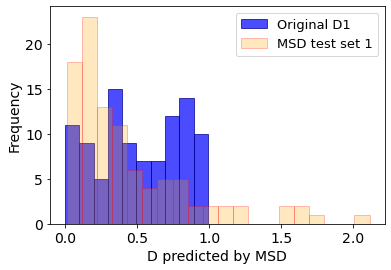

In [290]:
plt.hist(np.array(ny_D_track),color='blue',bins=10,alpha=0.70,edgecolor='darkblue',label='Original D1')
plt.hist(np.array(diff_coeff_list),color='orange',bins=20, alpha=0.25,edgecolor=(1, 0, 0, 1),label=r'MSD test set 1')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('D predicted by MSD',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=13)
plt.show()

In [167]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ny_D_track,diff_coeff_list))

0.2321655877916076


In [112]:
def msd_func(x,D):
    return 2*dim*D*(x)**1

t_x_data_list = []
t_slope_list = []
t_error_list = []
t_diff_coeff_list = []  
t_color_list = []
t_remove_list = []

for j in range(10):
    t_color_list.append(random_color())
    t_start_time = 0
    t_start_index = int(t_start_time/dt)
    t_end_time = len(MSDs[j])
    t_end_index = int(t_end_time/dt)
    t_x_data = [*range(0,len(MSDs[j]))]
    t_x_data_list.append(np.array(t_x_data))
    t_xx = t_x_data_list[j][:,np.newaxis]
    # xx = xx.astype('float64')
    t_a,t_resid,_,_ = np.linalg.lstsq(t_xx, MSDs[j], rcond=None)
    plt.plot(MSDs[j],color = t_color_list[j],label='MSD')
    plt.plot(t_xx, t_a*t_xx, color = t_color_list[j], linestyle='dashed', label=r'$y=4*D*\tau$')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(r'$\tau$',fontsize=14)
    plt.ylabel('MSD',fontsize=14)
    plt.legend()
    plt.figure()
    # r_squared = 1 - (resid / (MSDs[j].size * MSDs[j].var()))
    t_r_squared = 1 - t_resid / (sum((MSDs[j] - MSDs[j].mean())**2))
    t_error_list.append(t_r_squared)
    t_msds = MSDs[j]
    t_x = np.arange(1,len(t_msds) + 1)*dt
    popt,pcov = curve_fit(msd_func,t_x,t_msds)
    
    t_diff_coeff = popt[0]
    if t_diff_coeff > 3:
        t_remove_list.append(j)
    t_diff_coeff_list.append(t_diff_coeff)

t_d_track = D_track.tolist()
# print(diff_coeff_list)
# print(D_track)

print(len(t_diff_coeff_list))
print(len(t_d_track))            
delete_multiple_element(t_diff_coeff_list,t_remove_list)
delete_multiple_element(t_d_track,t_remove_list)
delete_multiple_element(t_error_list,t_remove_list)
print(len(t_diff_coeff_list))
print(len(t_d_track))        

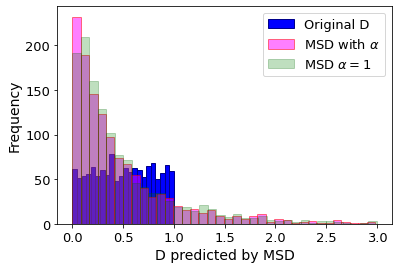

In [95]:
plt.hist(np.array(t_d_track),bins=int(np.sqrt(500)),color='blue',alpha=1,edgecolor='darkblue',label='Original D')
plt.hist(np.array(diff_coeff_list),bins=int(np.sqrt(num_traces)),color='magenta',alpha=0.5,edgecolor=(1, 0, 0, 1),label=r'MSD with $\alpha$')
plt.hist(np.array(t_diff_coeff_list),bins=int(np.sqrt(num_traces)),color='green',alpha=0.25,edgecolor='darkgreen',label=r'MSD $\alpha=1$')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('D predicted by MSD',fontsize = 14)
plt.ylabel('Frequency', fontsize=14)
# plt.xlim(-0.5,4.5)
# print(max(diff_coeff_list))
plt.legend(fontsize=13)
plt.show()

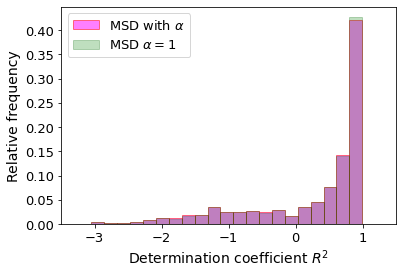

In [87]:
# print(np.array(error_list[:4]))
plt.hist(np.array(error_list),weights=np.ones_like(error_list) / len(error_list), bins=int(np.sqrt(num_traces)), color='magenta',alpha=0.5,edgecolor=(1, 0, 0, 1),label=r'MSD with $\alpha$')
plt.hist(np.array(t_error_list),weights=np.ones_like(t_error_list) / len(t_error_list), bins=int(np.sqrt(num_traces)), color='green',alpha=0.25,edgecolor='darkgreen',label=r'MSD $\alpha=1$')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Determination coefficient $R^2$',fontsize=14)
plt.ylabel('Relative frequency',fontsize=14)
plt.legend(fontsize=13)
plt.xlim(-3.5,1.5)
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ny_D_track,diff_coeff_list))
print(mean_squared_error(t_d_track,t_diff_coeff_list))

0.3277683715728193
0.33121496139593265


Text(0, 0.5, 'D predicted by MSD')

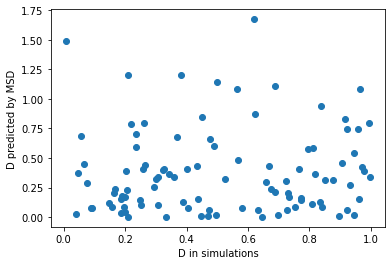

In [54]:
plt.scatter(D_track[200:], diff_coeff_list)
plt.xlabel('D in simulations')
plt.ylabel('D predicted by MSD')

# Machine Learning Neural Network NNMLPR

In [168]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [170]:
xy_train = np.concatenate((train_matrix_x,train_matrix_y),axis=1)
xy_val = np.concatenate((val_matrix_x,val_matrix_y),axis=1)
xy_test1 = np.concatenate((test_1_x,test_1_y),axis=1)
xy_test2 = np.concatenate((test_2_x,test_2_y),axis=1)
xy_test3 = np.concatenate((test_3_x,test_3_y),axis=1)

diffus_train = train_d_track
diffus_val = val_d_track
diffus_test1 = test_1_d_track
diffus_test2 = test_2_d_track
diffus_test3 = test_3_d_track

In [171]:
# data = np.concatenate((matrix_x_test,matrix_y_test),axis=1)
# diffus = np.concatenate((D_track,D_track))
# diffus = D_track
# xy_train, xy_test, d_train, d_test = train_test_split(data,diffus)
regr = MLPRegressor(hidden_layer_sizes=(100,),random_state=1, max_iter=500).fit(xy_train, diffus_train)
rx = regr.predict(xy_val)

print(diffus_val.shape)
print(xy_train.shape,diffus_train.shape)
# print(d_train)

mean_squared_error(diffus_val,rx)

(200,)
(800, 200) (800,)


0.1591311749438169

In [201]:
# Hyperoptimization

# hidden nodes
score_perf = []
j_list = []
hidden_layers1 = [10,100,200,300]
hidden_layers2 = [1,10,20,50]
learningrate = [0.001,0.01,1,10]
import itertools
a = [hidden_layers1,hidden_layers2,learningrate]
com_list = list(itertools.product(*a))
for i in range(len(com_list)):
  # learning rate 
  regr = MLPRegressor(hidden_layer_sizes=(com_list[i][0],com_list[i][1]),learning_rate='constant',learning_rate_init=com_list[i][2], random_state=1, max_iter=1000).fit(xy_train, diffus_train)  
  # correct answer
  correct_label = diffus_val
  rx = regr.predict(xy_val)
  score_perf.append(mean_squared_error(diffus_val,rx))
  j_list.append(com_list[i])
    
    
print(score_perf,j_list,len(com_list))

[0.08684326446023886, 0.08328343286390812, 0.0832506972419172, 0.10151861086430994, 0.14260264800065164, 0.16794847406261637, 0.08301681552313772, 162.9966993320843, 0.12160486065819912, 0.15496439259376246, 20.430431334802122, 2154.20067435077, 0.17797136819846401, 0.15109346316258562, 17.82139420771128, 552.0576598124471, 0.15227623661645873, 0.09608788269115782, 17.965398084493884, 2103.070735530555, 0.218434659879779, 0.12022143351088499, 1.2738225230859157, 329.1365051162067, 0.1533599238765192, 0.148445030026255, 32.59302793914728, 2258.233922500074, 0.1460495265428043, 0.13468306966773472, 28.27594262168328, 2221.286559353764, 0.0954221455927043, 0.0834730332643858, 0.08322875348365791, 0.10721667820892025, 0.17681904795614442, 0.10785119763936851, 13.30247516530619, 3182.0131755805255, 0.1482376475744116, 0.08237592342074322, 23.201059129366794, 2144.428519968841, 0.1567599371537698, 0.17037467184914526, 27.990093177098306, 2235.183395595963, 0.14008795638570024, 0.120807534626

In [208]:
j_list_ny= np.vstack(j_list)
h1,h2, lrt = j_list_ny[:,0],j_list_ny[:,1],j_list_ny[2]
h1

array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300.])

In [214]:
csv_result = pd.DataFrame(data={'Hidden layer size, learning rate': j_list, 'MSE': score_perf})
pd.DataFrame.to_csv(csv_result,'result.csv')

In [215]:
df = pd.read_csv("result.csv")
df.head()

,Unnamed: 0,"Hidden layer size, learning rate",MSE
0,0,"(10, 1, 0.001)",0.086843
1,1,"(10, 1, 0.01)",0.083283
2,2,"(10, 1, 1)",0.083251
3,3,"(10, 1, 10)",0.101519
4,4,"(10, 10, 0.001)",0.142603


In [224]:
regr = MLPRegressor(hidden_layer_sizes=(200,20),learning_rate='constant',learning_rate_init=0.01, random_state=1, max_iter=1000).fit(xy_train, diffus_train) 
xy_test1 = np.concatenate((test_1_x,test_1_y),axis=1)
xy_test2 = np.concatenate((test_2_x,test_2_y),axis=1)
xy_test3 = np.concatenate((test_3_x,test_3_y),axis=1)
rx1 = regr.predict(xy_test1)
rx2 = regr.predict(xy_test2)
rx3 = regr.predict(xy_test3)

mse1 = mean_squared_error(test_1_d_track,rx1)
mse2 = mean_squared_error(test_2_d_track,rx2)
mse3 = mean_squared_error(test_3_d_track,rx3)
mse = [mse1,mse2,mse3]
import statistics

print(mse1,mse2,mse3)
print("Standard deviation is % s "
                % (statistics.stdev(mse)))

0.07242152050360917 0.09804966277288968 0.08746508594766905
Standard deviation is 0.012878559728046666 


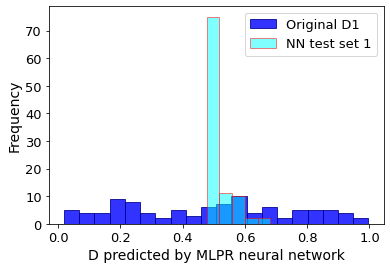

In [236]:
plt.hist(test_1_d_track,bins=20, color='blue',alpha=0.80,edgecolor='darkblue',label='Original D1')
plt.hist(rx1,color='cyan',bins=5, alpha=0.50,edgecolor=(1, 0, 0, 1),label=r'NN test set 1')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('D predicted by MLPR neural network',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=13)
plt.show()

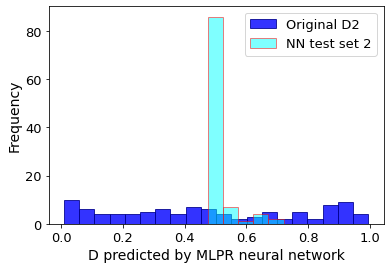

In [238]:
plt.hist(test_2_d_track,bins=20, color='blue',alpha=0.80,edgecolor='darkblue',label='Original D2')
plt.hist(rx2,color='cyan',bins=5, alpha=0.50,edgecolor=(1, 0, 0, 1),label=r'NN test set 2')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('D predicted by MLPR neural network',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=13)
plt.show()

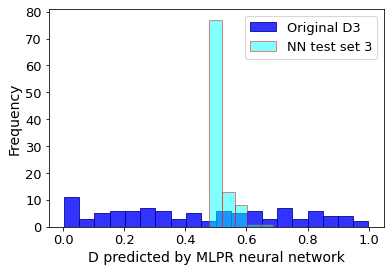

In [239]:
plt.hist(test_3_d_track,bins=20, color='blue',alpha=0.80,edgecolor='darkblue',label='Original D3')
plt.hist(rx3,color='cyan',bins=5, alpha=0.50,edgecolor=(1, 0, 0, 1),label=r'NN test set 3')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('D predicted by MLPR neural network',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(fontsize=13)
plt.show()

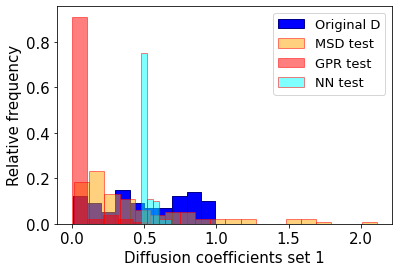

In [326]:
plt.hist(test_1_d_track,bins=10,color='blue',alpha=1,edgecolor='darkblue',weights=np.ones_like(test_1_d_track) / len(test_1_d_track),label='Original D')
plt.hist(np.array(diff_coeff_list),bins=20,color='orange', alpha=0.5,edgecolor=(1, 0, 0, 1),weights=np.ones_like(diff_coeff_list) / len(diff_coeff_list),label=r'MSD test')
plt.hist(np.array(result1),bins=5,color='red',alpha=0.5,edgecolor=(1, 0, 0, 1),weights=np.ones_like(result1) / len(result1),label=r'GPR test')
plt.hist(rx1,color='cyan',bins=5, alpha=0.50,edgecolor=(1, 0, 0, 1),weights=np.ones_like(rx1) / len(rx1),label=r'NN test')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Diffusion coefficients set 1',fontsize = 15)
plt.ylabel('Relative frequency', fontsize=15)
# plt.xlim(-0.5,4.5)
# print(max(diff_coeff_list))
plt.legend(fontsize=13)
plt.show()

Text(0, 0.5, 'D predicted by MSD')

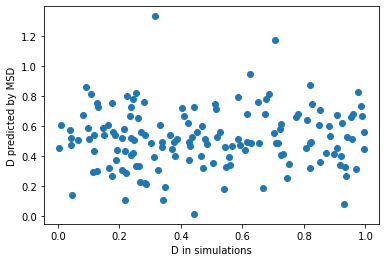

In [22]:
plt.scatter(diffus[(len(X_train)):], rx)
plt.xlabel('D in simulations')
plt.ylabel('D predicted by MSD')